<div style="width: 100%; height: 100px; background-color: #384ce1; text-align: center; line-height: 100px; color: #f4810a; font-size: 30px; font-weight: bold;">
Predicting NBA Players' Positon
</div>

<div style="width: 100%; background-color: #384ce1; color: #f4810a; padding: 20px; margin-bottom: 20px;">
    <h3 style="color: #f4810a;">Introduction</h3>
    <br/>
    <span>
        <p>Welcome to the "NBA Position Classifier" project, where we explore the fascinating realm of NBA basketball and delve into the complexities of player positions in the modern game. In this project, our objective is to develop a machine learning model that can accurately predict the most suitable position for NBA players based on their performance metrics.</p>
    </span>
    <h3 style="color: #f4810a;">Background</h3>
    <span>
        <p>Traditionally, the NBA has been characterized by distinct player positions, each with its own set of responsibilities and skill requirements. Positions such as point guard, shooting guard, small forward, power forward, and center have long defined team compositions and strategic approaches to the game. However, in recent years, there has been a noticeable shift towards a more fluid and positionless style of play.</p>
        <p>The rise of versatile players who can excel in multiple roles on the court has blurred the lines between traditional positions. Players like LeBron James, Giannis Antetokounmpo, and Kevin Durant are prime examples of this trend, possessing the size, athleticism, and skill set to impact the game across multiple positions. As a result, coaches and teams are increasingly prioritizing versatility and adaptability in their player evaluations and lineup constructions.</p>
    </span>
    <h3 style="color: #f4810a;">Research Question</h3>
    <span>
        <p>Against this backdrop of evolving player roles and positional fluidity, our research question seeks to address the following:</p>
        <blockquote style='border-left: #f4810a'>
            <p>"How can we leverage machine learning techniques to accurately classify NBA players into their most suitable positions in an era of increasing positionless basketball?"</p>
        </blockquote>
        <p>By analyzing comprehensive player performance data and leveraging advanced machine learning algorithms, we aim to provide valuable insights into the changing dynamics of player positions in the NBA and develop a predictive model that reflects the modern landscape of basketball.</p>
    </span>
    <h3 style="color: #f4810a;">Contents of this Notebook</h3>
    <ul style="list-style-type: none; padding-left: 0;">
        <li><span style="margin-left: -10px;">&#8226;</span> Data Cleaning </li>
        <li><span style="margin-left: -10px;">&#8226;</span> Exploratory Data Analytics and Data Visualization</li>
        <li><span style="margin-left: -10px;">&#8226;</span> Predictive Modeling</li>
    </ul>
</div>


# 
<div style="color: #f4810a; font-size: 20px; font-weight: bold;">
Import Necessary Packages
</div>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 
<div style="color: #f4810a; font-size: 20px; font-weight: bold;">
Read in Data
</div>

In [2]:
stats = pd.read_csv('2023_nba_player_stats.csv')
stats.head()

,PName,POS,Team,Age,GP,W,L,Min,PTS,FGM,...,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-
0,Jayson Tatum,SF,BOS,25,74,52,22,2732.2,2225,727,...,649,342,213,78,51,160,3691,31,1,470
1,Joel Embiid,C,PHI,29,66,43,23,2284.1,2183,728,...,670,274,226,66,112,205,3706,39,1,424
2,Luka Doncic,PG,DAL,24,66,33,33,2390.5,2138,719,...,569,529,236,90,33,166,3747,36,10,128
3,Shai Gilgeous-Alexander,PG,OKC,24,68,33,35,2416.0,2135,704,...,329,371,192,112,65,192,3425,3,0,149
4,Giannis Antetokounmpo,PF,MIL,28,63,47,16,2023.6,1959,707,...,742,359,246,52,51,197,3451,46,6,341


# 
<div style="color: #f4810a; font-size: 20px; font-weight: bold;">
Merge and Clean Data
</div>

In [3]:
attributes = pd.read_csv('players.csv')
attributes.head()

,Name,Position,Team,Age,Height,Height_i,Weight,College,Salary,Points,Rebounds,Assists
0,Juhann Begarin,SG,Boston Celtics,19,"6' 5""",6.50,185,NaN,NaN,NaN,NaN,NaN
1,Jaylen Brown,SG,Boston Celtics,24,"6' 6""",6.60,223,California,26758928.0,24.7,6.0,3.4
2,Kris Dunn,PG,Boston Celtics,27,"6' 3""",6.30,205,Providence,5005350.0,1.3,1.5,0.5
3,Carsen Edwards,PG,Boston Celtics,23,"5' 11""",5.11,200,Purdue,1782621.0,4.0,0.8,0.5
4,Tacko Fall,C,Boston Celtics,25,"7' 5""",7.50,311,UCF,NaN,2.5,2.7,0.2


In [4]:
df = pd.merge(stats, attributes, left_on='PName', right_on='Name')
df.head()

,PName,POS,Team_x,Age_x,GP,W,L,Min,PTS,FGM,...,Team_y,Age_y,Height,Height_i,Weight,College,Salary,Points,Rebounds,Assists
0,Jayson Tatum,SF,BOS,25,74,52,22,2732.2,2225,727,...,Boston Celtics,23,"6' 8""",6.80,210,Duke,28103500.0,26.4,7.4,4.3
1,Joel Embiid,C,PHI,29,66,43,23,2284.1,2183,728,...,Philadelphia Sixers,27,"7' 0""",7.00,280,Kansas,31579390.0,28.5,10.6,2.8
2,Luka Doncic,PG,DAL,24,66,33,33,2390.5,2138,719,...,Dallas Mavericks,22,"6' 7""",6.70,230,NaN,10174391.0,27.7,8.0,8.6
3,Shai Gilgeous-Alexander,PG,OKC,24,68,33,35,2416.0,2135,704,...,Oklahoma City Thunder,23,"6' 6""",6.60,180,Kentucky,5495532.0,23.7,4.7,5.9
4,Giannis Antetokounmpo,PF,MIL,28,63,47,16,2023.6,1959,707,...,Milwaukee Bucks,26,"6' 11""",6.11,242,NaN,39344970.0,28.1,11.0,5.9


In [5]:
df.columns

Index(['PName', 'POS', 'Team_x', 'Age_x', 'GP', 'W', 'L', 'Min', 'PTS', 'FGM',
       'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB',
       'REB', 'AST', 'TOV', 'STL', 'BLK', 'PF', 'FP', 'DD2', 'TD3', '+/-',
       'Name', 'Position', 'Team_y', 'Age_y', 'Height', 'Height_i', 'Weight',
       'College', 'Salary', 'Points', 'Rebounds', 'Assists'],
      dtype='object')

In [6]:
df = df[['PName', 'POS', 'GP', 'W', 'L', 'PTS', 'FG%', '3P%', 'FT%', 'REB', 
                  'AST', 'TOV', 'STL', 'BLK', 'Height', 'Weight']]
df

,PName,POS,GP,W,L,PTS,FG%,3P%,FT%,REB,AST,TOV,STL,BLK,Height,Weight
0,Jayson Tatum,SF,74,52,22,2225,46.6,35.0,85.4,649,342,213,78,51,"6' 8""",210
1,Joel Embiid,C,66,43,23,2183,54.8,33.0,85.7,670,274,226,66,112,"7' 0""",280
2,Luka Doncic,PG,66,33,33,2138,49.6,34.2,74.2,569,529,236,90,33,"6' 7""",230
3,Shai Gilgeous-Alexander,PG,68,33,35,2135,51.0,34.5,90.5,329,371,192,112,65,"6' 6""",180
4,Giannis Antetokounmpo,PF,63,47,16,1959,55.3,27.5,64.5,742,359,246,52,51,"6' 11""",242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,Vernon Carey Jr.,C,11,8,3,6,25.0,0.0,100.0,11,3,2,2,2,"6' 9""",270
404,Dylan Windler,SG,3,3,0,5,66.7,50.0,0.0,0,1,1,1,0,"6' 6""",196
405,Devon Dotson,G,6,1,5,3,10.0,25.0,0.0,10,8,3,5,0,"6' 2""",185
406,Frank Jackson,NaN,1,0,1,0,0.0,0.0,0.0,2,1,0,0,0,"6' 3""",205


In [7]:
df.POS.unique()

array(['SF', 'C', 'PG', 'PF', 'SG', 'F', 'G', nan], dtype=object)

Remove "hybrid" and NaN positions.

In [8]:
df = df.drop(df[(df['POS'] == 'F') | (df['POS'] == 'G') | (df['POS'].isna())].index)
df

,PName,POS,GP,W,L,PTS,FG%,3P%,FT%,REB,AST,TOV,STL,BLK,Height,Weight
0,Jayson Tatum,SF,74,52,22,2225,46.6,35.0,85.4,649,342,213,78,51,"6' 8""",210
1,Joel Embiid,C,66,43,23,2183,54.8,33.0,85.7,670,274,226,66,112,"7' 0""",280
2,Luka Doncic,PG,66,33,33,2138,49.6,34.2,74.2,569,529,236,90,33,"6' 7""",230
3,Shai Gilgeous-Alexander,PG,68,33,35,2135,51.0,34.5,90.5,329,371,192,112,65,"6' 6""",180
4,Giannis Antetokounmpo,PF,63,47,16,1959,55.3,27.5,64.5,742,359,246,52,51,"6' 11""",242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,Isaiah Todd,PF,6,2,4,9,15.8,10.0,100.0,12,4,2,1,0,"6' 10""",210
400,Joe Wieskamp,SF,9,6,3,9,21.4,25.0,0.0,4,3,1,0,0,"6' 6""",210
402,Mfiondu Kabengele,C,4,3,1,6,28.6,0.0,100.0,10,0,1,2,0,"6' 9""",250
403,Vernon Carey Jr.,C,11,8,3,6,25.0,0.0,100.0,11,3,2,2,2,"6' 9""",270


Convert Heights from strings to integers for computation. 

In [9]:
def convert_height_to_inches(height):
    if isinstance(height, str):
        parts = height.split("'")
        if len(parts) == 2:
            feet = int(parts[0])
            inches = int(parts[1].replace('"', ''))  # Remove double quote character
            return (feet * 12) + inches
    return np.nan

df['Height'] = df['Height'].apply(convert_height_to_inches)
df

,PName,POS,GP,W,L,PTS,FG%,3P%,FT%,REB,AST,TOV,STL,BLK,Height,Weight
0,Jayson Tatum,SF,74,52,22,2225,46.6,35.0,85.4,649,342,213,78,51,80,210
1,Joel Embiid,C,66,43,23,2183,54.8,33.0,85.7,670,274,226,66,112,84,280
2,Luka Doncic,PG,66,33,33,2138,49.6,34.2,74.2,569,529,236,90,33,79,230
3,Shai Gilgeous-Alexander,PG,68,33,35,2135,51.0,34.5,90.5,329,371,192,112,65,78,180
4,Giannis Antetokounmpo,PF,63,47,16,1959,55.3,27.5,64.5,742,359,246,52,51,83,242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,Isaiah Todd,PF,6,2,4,9,15.8,10.0,100.0,12,4,2,1,0,82,210
400,Joe Wieskamp,SF,9,6,3,9,21.4,25.0,0.0,4,3,1,0,0,78,210
402,Mfiondu Kabengele,C,4,3,1,6,28.6,0.0,100.0,10,0,1,2,0,81,250
403,Vernon Carey Jr.,C,11,8,3,6,25.0,0.0,100.0,11,3,2,2,2,81,270


Calculate per game statistics instead of season statistics for reduced variance between players.

In [10]:
df[['PTS', 'REB', 'AST', 'TOV', 'STL', 'BLK']] = df[['PTS', 'REB', 'AST', 'TOV', 'STL', 'BLK']]\
    .div(df['GP'], axis = 0)
df

,PName,POS,GP,W,L,PTS,FG%,3P%,FT%,REB,AST,TOV,STL,BLK,Height,Weight
0,Jayson Tatum,SF,74,52,22,30.067568,46.6,35.0,85.4,8.770270,4.621622,2.878378,1.054054,0.689189,80,210
1,Joel Embiid,C,66,43,23,33.075758,54.8,33.0,85.7,10.151515,4.151515,3.424242,1.000000,1.696970,84,280
2,Luka Doncic,PG,66,33,33,32.393939,49.6,34.2,74.2,8.621212,8.015152,3.575758,1.363636,0.500000,79,230
3,Shai Gilgeous-Alexander,PG,68,33,35,31.397059,51.0,34.5,90.5,4.838235,5.455882,2.823529,1.647059,0.955882,78,180
4,Giannis Antetokounmpo,PF,63,47,16,31.095238,55.3,27.5,64.5,11.777778,5.698413,3.904762,0.825397,0.809524,83,242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,Isaiah Todd,PF,6,2,4,1.500000,15.8,10.0,100.0,2.000000,0.666667,0.333333,0.166667,0.000000,82,210
400,Joe Wieskamp,SF,9,6,3,1.000000,21.4,25.0,0.0,0.444444,0.333333,0.111111,0.000000,0.000000,78,210
402,Mfiondu Kabengele,C,4,3,1,1.500000,28.6,0.0,100.0,2.500000,0.000000,0.250000,0.500000,0.000000,81,250
403,Vernon Carey Jr.,C,11,8,3,0.545455,25.0,0.0,100.0,1.000000,0.272727,0.181818,0.181818,0.181818,81,270


In [11]:
df = df.rename(columns={"PName": "Name",
                        "POS": "Position",
                        "GP": "Games Played",
                        "W": "Wins",
                        "L": "Losses",
                        "PTS": "Points per Game",
                        "FG%": "Field Goal Percentage",
                        "3P%": "3-Point Percentage",
                        "FT%": "Free Throw Percentage",
                        "REB": "Rebounds per Game",
                        "AST": "Assists per Game",
                        "TOV": "Turnovers per Game",
                        "STL": "Steals per Game",
                        "BLK": "Blocks per Game"})
df

,Name,Position,Games Played,Wins,Losses,Points per Game,Field Goal Percentage,3-Point Percentage,Free Throw Percentage,Rebounds per Game,Assists per Game,Turnovers per Game,Steals per Game,Blocks per Game,Height,Weight
0,Jayson Tatum,SF,74,52,22,30.067568,46.6,35.0,85.4,8.770270,4.621622,2.878378,1.054054,0.689189,80,210
1,Joel Embiid,C,66,43,23,33.075758,54.8,33.0,85.7,10.151515,4.151515,3.424242,1.000000,1.696970,84,280
2,Luka Doncic,PG,66,33,33,32.393939,49.6,34.2,74.2,8.621212,8.015152,3.575758,1.363636,0.500000,79,230
3,Shai Gilgeous-Alexander,PG,68,33,35,31.397059,51.0,34.5,90.5,4.838235,5.455882,2.823529,1.647059,0.955882,78,180
4,Giannis Antetokounmpo,PF,63,47,16,31.095238,55.3,27.5,64.5,11.777778,5.698413,3.904762,0.825397,0.809524,83,242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,Isaiah Todd,PF,6,2,4,1.500000,15.8,10.0,100.0,2.000000,0.666667,0.333333,0.166667,0.000000,82,210
400,Joe Wieskamp,SF,9,6,3,1.000000,21.4,25.0,0.0,0.444444,0.333333,0.111111,0.000000,0.000000,78,210
402,Mfiondu Kabengele,C,4,3,1,1.500000,28.6,0.0,100.0,2.500000,0.000000,0.250000,0.500000,0.000000,81,250
403,Vernon Carey Jr.,C,11,8,3,0.545455,25.0,0.0,100.0,1.000000,0.272727,0.181818,0.181818,0.181818,81,270


Set the minimum game limit to 25 to minimize outliers. 

# 
<div style="color: #f4810a; font-size: 20px; font-weight: bold;">
Exploratory Data Analytics
</div>

In [12]:
df.shape

(358, 16)

In [13]:
df.describe()

,Games Played,Wins,Losses,Points per Game,Field Goal Percentage,3-Point Percentage,Free Throw Percentage,Rebounds per Game,Assists per Game,Turnovers per Game,Steals per Game,Blocks per Game,Height,Weight
count,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000
mean,55.924581,28.421788,27.502793,10.950613,47.827374,32.612291,75.840503,4.048856,2.492506,1.288083,0.695685,0.435366,78.659218,218.069832
std,19.871785,12.987099,11.334177,7.120921,8.359016,11.808472,14.666546,2.308436,2.058829,0.845842,0.372501,0.389832,3.262736,24.463043
min,1.000000,0.000000,0.000000,0.545455,15.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,71.000000,165.000000
25%,43.250000,19.000000,21.000000,5.632937,43.000000,30.300000,71.400000,2.500000,1.000000,0.649530,0.412084,0.181818,76.000000,200.000000
50%,61.500000,30.000000,28.000000,9.061039,46.550000,35.000000,77.800000,3.604102,1.657239,1.029828,0.651087,0.333333,79.000000,215.000000
75%,71.000000,38.000000,35.000000,14.755541,51.625000,38.900000,84.650000,5.012931,3.482684,1.737153,0.933333,0.551474,81.000000,235.000000
max,83.000000,57.000000,60.000000,33.075758,81.900000,100.000000,100.000000,12.535714,10.655172,4.109589,1.840000,3.000000,88.000000,290.000000


In [14]:
position = df.groupby(['Position'])
position.mean()

,Games Played,Wins,Losses,Points per Game,Field Goal Percentage,3-Point Percentage,Free Throw Percentage,Rebounds per Game,Assists per Game,Turnovers per Game,Steals per Game,Blocks per Game,Height,Weight
Position,,,,,,,,,,,,,,
C,49.875000,24.500000,25.375000,9.043878,57.218750,23.756250,69.571875,5.760676,1.405275,1.130326,0.457893,0.752658,82.890625,251.546875
PF,56.072464,28.710145,27.362319,9.653182,48.578261,32.576812,75.237681,4.784298,1.742596,1.117599,0.602908,0.596583,80.521739,231.057971
PG,57.000000,29.779412,27.220588,12.883529,44.129412,34.025000,79.522059,3.134565,4.452131,1.703309,0.831039,0.272335,74.823529,193.323529
SF,57.375000,28.597222,28.777778,10.908110,45.837500,34.440278,74.702778,3.694486,1.994724,1.097921,0.689629,0.349627,79.055556,217.013889
SG,58.270588,29.905882,28.364706,11.929150,44.790588,36.630588,79.068235,3.194556,2.773828,1.374154,0.846889,0.268645,76.694118,203.011765


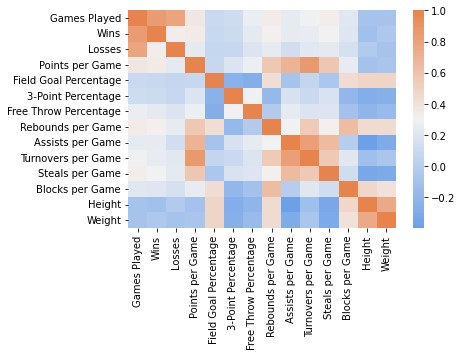

<Figure size 432x288 with 0 Axes>

In [15]:
corr_matrix = df.corr()
custom_cmap = sns.diverging_palette(250, 30, l=65, center="light", as_cmap=True)
sns.heatmap(corr_matrix, cmap = custom_cmap)
fig = plt.figure()

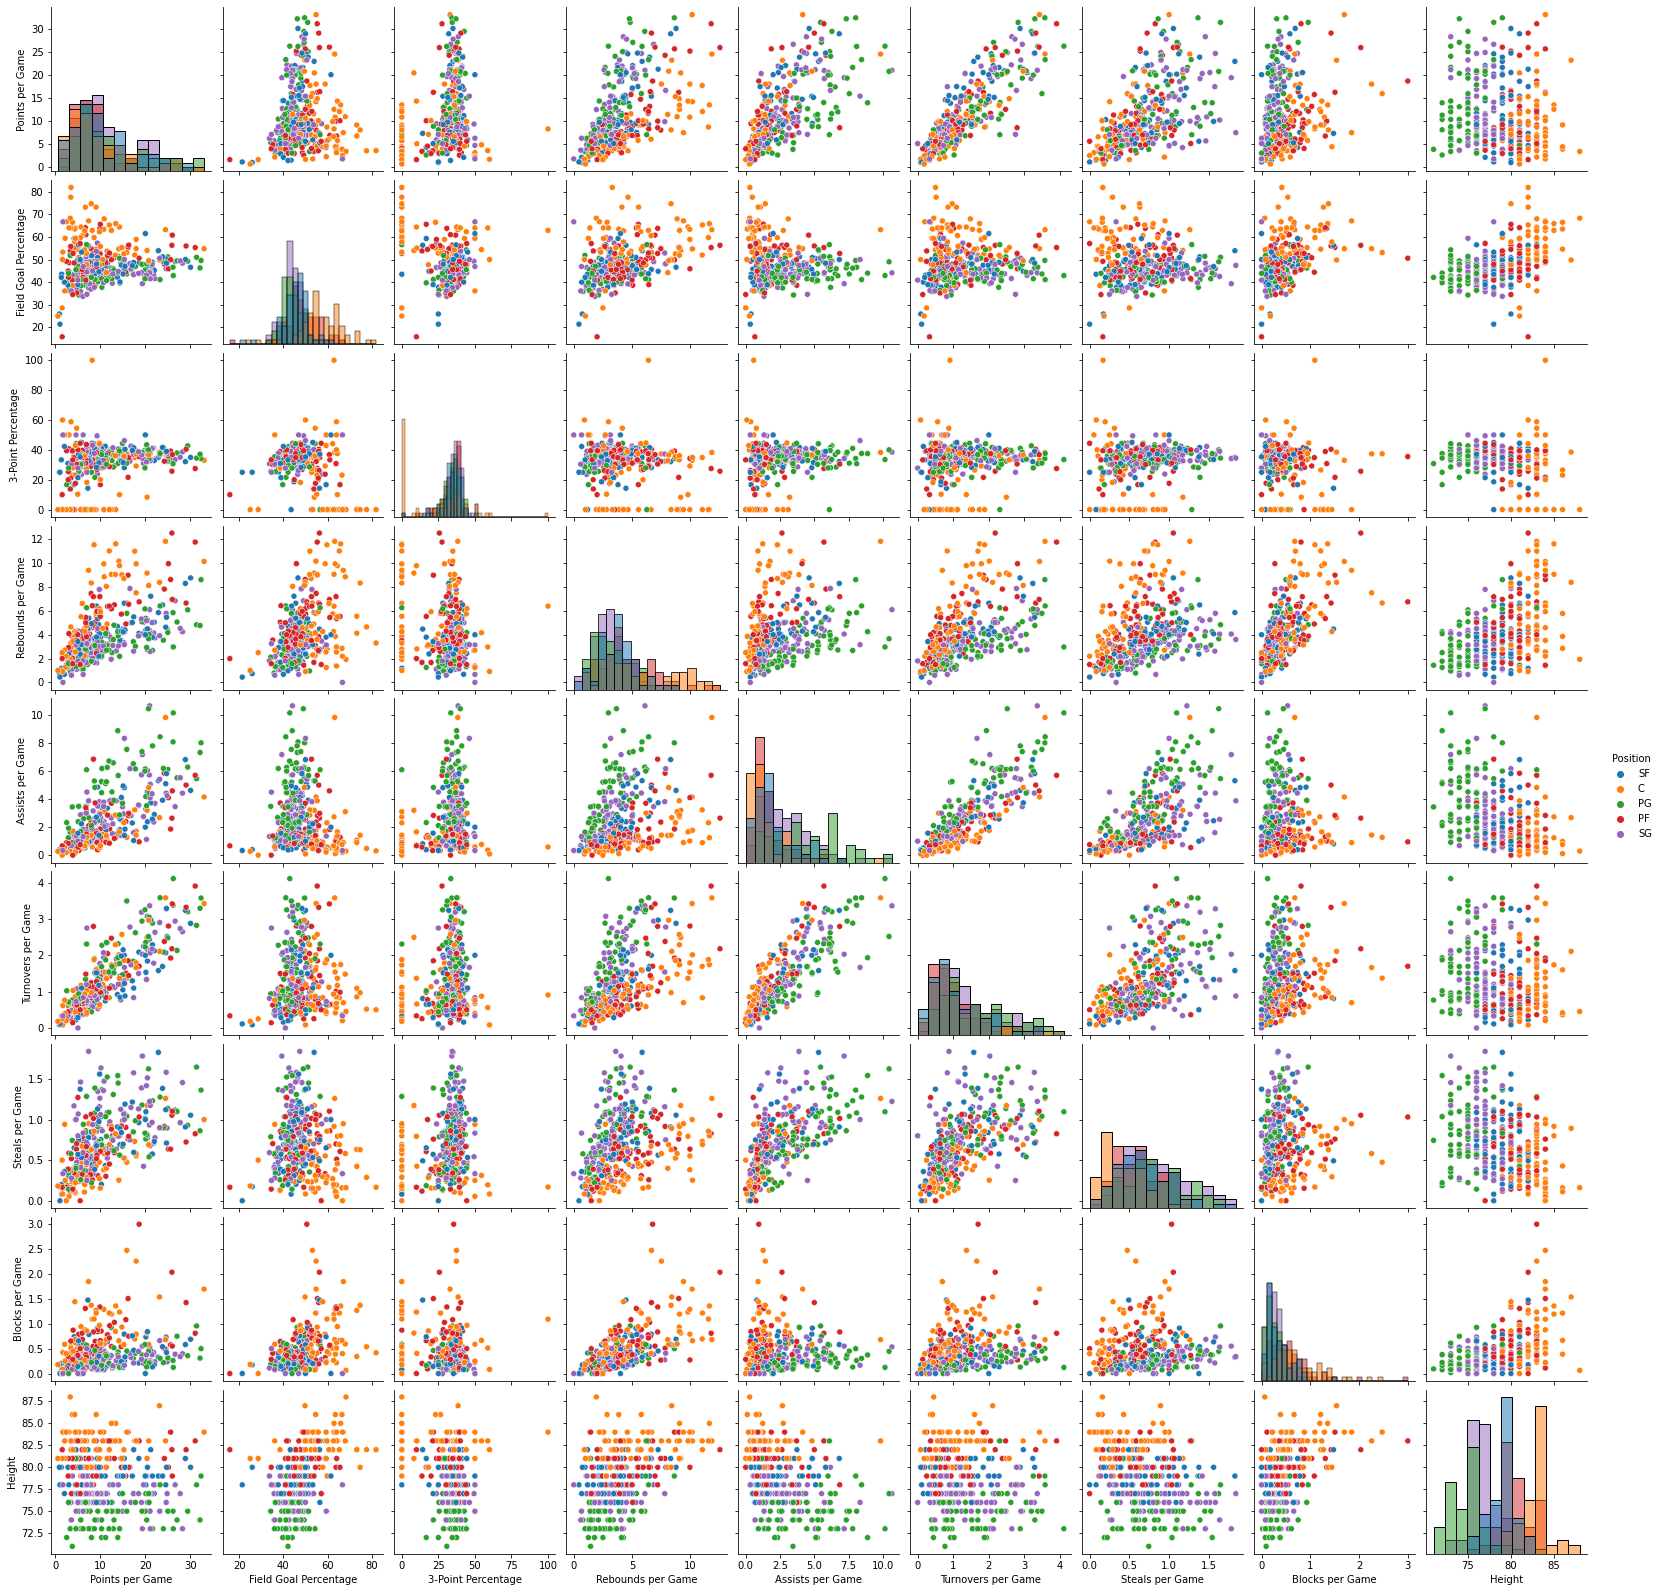

In [16]:
sns.pairplot(df, hue='Position', vars=['Points per Game', 'Field Goal Percentage', '3-Point Percentage', 'Rebounds per Game', 'Assists per Game', 'Turnovers per Game', 'Steals per Game', 'Blocks per Game', 'Height'],
 diag_kind='hist')
plt.show()

# 
<div style="color: #f4810a; font-size: 20px; font-weight: bold;">
Predictive Modeling
</div>

In [ ]:
df = df.drop('Name', axis=1)

In [29]:

X = df[['Height', 'Weight', 'Assists per Game']]
Y = df['Position']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5555555555555556
